In [1]:

import pandas as pd
import numpy as np
import os
# import torch
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import cv2
import mediapipe as mp
from tensorflow.keras.utils import to_categorical

In [2]:
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=False, max_num_hands=2, min_detection_confidence=0.5)
mp_draw = mp.solutions.drawing_utils

In [3]:
data_path = os.path.join("../Data")
train_data_path = os.path.join(data_path, "asl_alphabet_train/asl_alphabet_train")
test_data_path = os.path.join(data_path, "asl_alphabet_test/asl_alphabet_test")

In [4]:
camera = cv2.VideoCapture(0)

if not camera :
    print("Unable to open camera")
    exit()
    
while True :
    ret, frame = camera.read()
    if not ret :
        print("Unable to read from camera")
        break
    
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = hands.process(rgb_frame)
    
    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            h, w, _ = frame.shape
            
            for idx in [8,12]:
                x = int(hand_landmarks.landmark[idx].x * w)
                y = int(hand_landmarks.landmark[idx].y * h)
                
                cv2.circle(frame, (x, y), 3, (0, 255, 0), -1)
            
    cv2.imshow("Hand Tracking", frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

camera.release()
cv2.destroyAllWindows()

c:\Users\Shruti\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


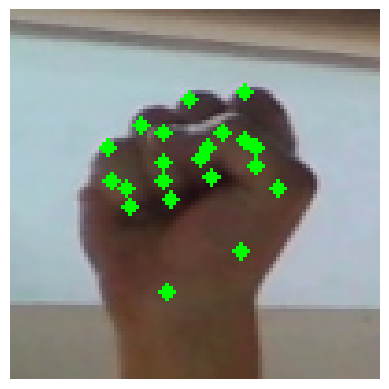

Landmark Count: 21
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [5]:
image_path = os.path.join("D:\\Individual Folder\\Shruti\\Projects\\SignLanguage\\Data\\asl_alphabet_train\\asl_alphabet_train\\S\\S23.jpg")
image = cv2.imread(image_path)
h, w, _ = image.shape  

mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=True, max_num_hands=2)

result = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

if result.multi_hand_landmarks:
    for hand_landmarks in result.multi_hand_landmarks:
        x_min = max(0, int(min([lm.x for lm in hand_landmarks.landmark]) * w - 30))
        y_min = max(0, int(min([lm.y for lm in hand_landmarks.landmark]) * h - 30))
        x_max = min(w, int(max([lm.x for lm in hand_landmarks.landmark]) * w + 30))
        y_max = min(h, int(max([lm.y for lm in hand_landmarks.landmark]) * h + 30))

        hand_frame = image[y_min:y_max, x_min:x_max]

        hand_frame_resized = cv2.resize(hand_frame, (100, 100))

        landmark_tensor = np.zeros((100, 100))

        for idx in range(21):
            x = int(hand_landmarks.landmark[idx].x * w)
            y = int(hand_landmarks.landmark[idx].y * h)

            x_resized = min(int(((x - x_min) / (x_max - x_min)) * 99), 99)
            y_resized = min(int(((y - y_min) / (y_max - y_min)) * 99), 99)

            landmark_tensor[y_resized, x_resized] = 1 

            cv2.circle(hand_frame_resized, (x_resized, y_resized), 2, (0, 255, 0), -1)

        plt.imshow(cv2.cvtColor(hand_frame_resized, cv2.COLOR_BGR2RGB))
        plt.axis("off")
        plt.show()

        print("Landmark Count:", int(np.sum(landmark_tensor)))
        print(landmark_tensor)

In [7]:
def extract_image_hand_landmarks(data_path) :
    landmark_tensors = []
    labels = []
    
    for label in os.listdir(data_path) :
        label_path = os.path.join(data_path, label)
        
        if os.path.isdir(label_path) :
            for image_name in os.listdir(label_path) :
                image_path = os.path.join(label_path, image_name)
                
                if image_path.endswith(".jpg") or image_path.endswith(".png") :
                    image = cv2.imread(image_path)
                    h, w, _ = image.shape
                    
                    landmark_tensor = np.zeros((200, 200))
                    
                    result = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
                    
                    if result.multi_hand_landmarks :
                        for hand_landmarks in result.multi_hand_landmarks :
                            for idx in range(0,21) :
                                x = int(hand_landmarks.landmark[idx].x * w)
                                y = int(hand_landmarks.landmark[idx].y * h)
                                
                                x_norm = min(int((x / w) * 199), 199)
                                y_norm = min(int((y / h) * 199), 199)
                                
                                landmark_tensor[y_norm, x_norm] = 1
                    
                    landmark_tensors.append(landmark_tensor)
                    labels.append(label)
        
    return landmark_tensors, labels

In [4]:
def extract_image_hand_landmarks(data_path) :
    landmark_tensors = []
    labels = []
    
    for label in os.listdir(data_path) :
        label_path = os.path.join(data_path, label)
        
        if os.path.isdir(label_path) :
            for image_name in os.listdir(label_path) :
                image_path = os.path.join(label_path, image_name)
                
                if image_path.endswith(".jpg") or image_path.endswith(".png") :
                    image = cv2.imread(image_path)
                    h, w, _ = image.shape
                    
                    
                    result = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
                    
                    if result.multi_hand_landmarks :
                        for hand_landmarks in result.multi_hand_landmarks :
                            x_min = max(0, int(min([lm.x for lm in hand_landmarks.landmark]) * w - 30))
                            y_min = max(0, int(min([lm.y for lm in hand_landmarks.landmark]) * h - 30))
                            x_max = min(w, int(max([lm.x for lm in hand_landmarks.landmark]) * w + 30))
                            y_max = min(h, int(max([lm.y for lm in hand_landmarks.landmark]) * h + 30))

                            hand_frame = image[y_min:y_max, x_min:x_max]
                            
                            hand_frame_resized = cv2.resize(hand_frame, (100,100))
                            
                            landmark_tensor = []
                            landmark_tensor = np.zeros((100, 100))
                            
                            for idx in range(0,21) :
                                x = int(hand_landmarks.landmark[idx].x * w)
                                y = int(hand_landmarks.landmark[idx].y * h)
                                
                                x_norm = min(int(((x - x_min) / (x_max - x_min)) * 99), 99)
                                y_norm = min(int(((y - y_min) / (y_max - y_min)) * 99), 99)
                                
                                landmark_tensor[y_norm, x_norm] = 1
                    
                    landmark_tensors.append(landmark_tensor)
                    labels.append(label)

            print("Done ------- ", label)
    return np.asarray(landmark_tensors), np.asarray(labels)

In [5]:
landmark_tensor, labels = extract_image_hand_landmarks(train_data_path)

c:\Users\Shruti\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Done -------  A
Done -------  B
Done -------  C
Done -------  D
Done -------  E
Done -------  F
Done -------  G
Done -------  H
Done -------  I
Done -------  J
Done -------  K
Done -------  L
Done -------  M
Done -------  N
Done -------  O
Done -------  P
Done -------  Q
Done -------  R
Done -------  S
Done -------  T
Done -------  U
Done -------  V
Done -------  W
Done -------  X
Done -------  Y
Done -------  Z


In [6]:
landmark_tensor.shape

(78000, 100, 100)

In [7]:
labels.shape

(78000,)

In [8]:
X = np.array(landmark_tensor).reshape(-1, 100, 100, 1)

In [9]:
unique_labels = np.unique(labels) 
label_to_index = {label: i for i, label in enumerate(unique_labels)}
y_indices = np.array([label_to_index[label] for label in labels])
y = to_categorical(y_indices, num_classes=len(unique_labels))

In [10]:
X.shape

(78000, 100, 100, 1)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 1)),
    MaxPooling2D((2,2)),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5), 
    Dense(len(unique_labels), activation='softmax')
])

c:\Users\Shruti\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 98, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 47, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,638,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 26)             │         3,354 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,734,554 (6.62 MB)

 Trainable params: 1,734,554 (6.62 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/30
1950/1950 ━━━━━━━━━━━━━━━━━━━━ 143s 72ms/step - accuracy: 0.7430 - loss: 0.9125 - val_accuracy: 0.9684 - val_loss: 0.1269
Epoch 2/30
1950/1950 ━━━━━━━━━━━━━━━━━━━━ 141s 72ms/step - accuracy: 0.9324 - loss: 0.2308 - val_accuracy: 0.9753 - val_loss: 0.0965
Epoch 3/30
1950/1950 ━━━━━━━━━━━━━━━━━━━━ 144s 74ms/step - accuracy: 0.9532 - loss: 0.1590 - val_accuracy: 0.9797 - val_loss: 0.0849
Epoch 4/30
1950/1950 ━━━━━━━━━━━━━━━━━━━━ 147s 75ms/step - accuracy: 0.9612 - loss: 0.1225 - val_accuracy: 0.9810 - val_loss: 0.0738
Epoch 5/30
1950/1950 ━━━━━━━━━━━━━━━━━━━━ 146s 75ms/step - accuracy: 0.9672 - loss: 0.1028 - val_accuracy: 0.9804 - val_loss: 0.0790
Epoch 6/30
1950/1950 ━━━━━━━━━━━━━━━━━━━━ 155s 79ms/step - accuracy: 0.9720 - loss: 0.0888 - val_accuracy: 0.9830 - val_loss: 0.0769
Epoch 7/30
1950/1950 ━━━━━━━━━━━━━━━━━━━━ 155s 80ms/step - accuracy: 0.9766 - loss: 0.0710 - val_accuracy: 0.9813 - val_loss: 0.0770
Epoch 8/30
1950/1950 ━━━━━━━━━━━━━━━━━━━━ 157s 81ms/step - accuracy: 

In [16]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

488/488 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.9849 - loss: 0.1027
Test Accuracy: 0.9848


In [17]:
model.save("30_binary_model.h5")